<a href="https://colab.research.google.com/github/sekunder/NMA_Project/blob/master/import_figshare_static_gratings_multi_animals_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT**

---
PACKAGES 



In [19]:
import os, requests
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.stats import zscore
from sklearn.decomposition import PCA 

IMPORT DATA AND ASSIGN TO OBJECT(S)

In [8]:
################## ################## ################## ANIMAL GT3
# import data 
fname = "gratings_static_GT3_2019_04_17_1.npy"
url = "https://janelia.figshare.com/ndownloader/files/15479243"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)


In [36]:
# assign to object 
dat_gratings_static_GT3 = np.load('gratings_static_GT3_2019_04_17_1.npy', allow_pickle=True).item()

type(dat_gratings_static_GT3) #should be dict

dict

# BEING LAZY AND JUST COPY PASTING RATHER THAN DO IT EFFICIENTLY 





In [38]:
################## ################## ##################  ANIMAL GT1
# import data 
fname = "gratings_static_GT1_2019_04_17_1.npy"
url = "https://janelia.figshare.com/ndownloader/files/15479342"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

# assign to object 
dat_gratings_static_GT1 = np.load('gratings_static_GT1_2019_04_17_1.npy', allow_pickle=True).item()

type(dat_gratings_static_GT3) #should be dict



dict

In [40]:
################## ################## ################## ANIMAL GT2

# import data 
fname = "gratings_static_GT2_2019_04_17_1.npy"
url = "https://janelia.figshare.com/ndownloader/files/15479336"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

# assign to object 
dat_gratings_static_GT2 = np.load('gratings_static_GT2_2019_04_17_1.npy', allow_pickle=True).item()

type(dat_gratings_static_GT3) #should be dict

dict

PCA

In [43]:
n_cmp = 20

#data needs to be assigned

def run_pca(data, zs=True, n_cmp=n_cmp):
  if zs:
    Z = zscore(data['sresp'], axis=1)
  else:
    Z = data['sresp']
  p = PCA(n_components = n_cmp)
  p.fit_transform(Z.T)
  X = p.components_@Z
  return p, X

def plot_pca_weights(data, istim, X, n_cmp=n_cmp):
  b,a = butter(4, [0.05], 'lowpass') #creating a low pass butterworth filter
  idx = np.argsort(data['istim'])
  fig = plt.figure(figsize = (15,10))
  for j in np.arange(n_cmp):
      ax = fig.add_subplot(4,5,j+1,polar = True)
      plt.plot(data['istim'][idx],filtfilt(b,a,X[j,idx]))
      #plt.scatter(data['istim'][idx],X[j,idx])
      plt.title('PC %d\n' %j, loc='center', pad=-85)
      ax.set_thetamin(0)
      ax.set_thetamax(360)
  plt.show()

RUN AND PLOT 

# # # # # # #  # # # # # # #  # # # # # # # GT1 


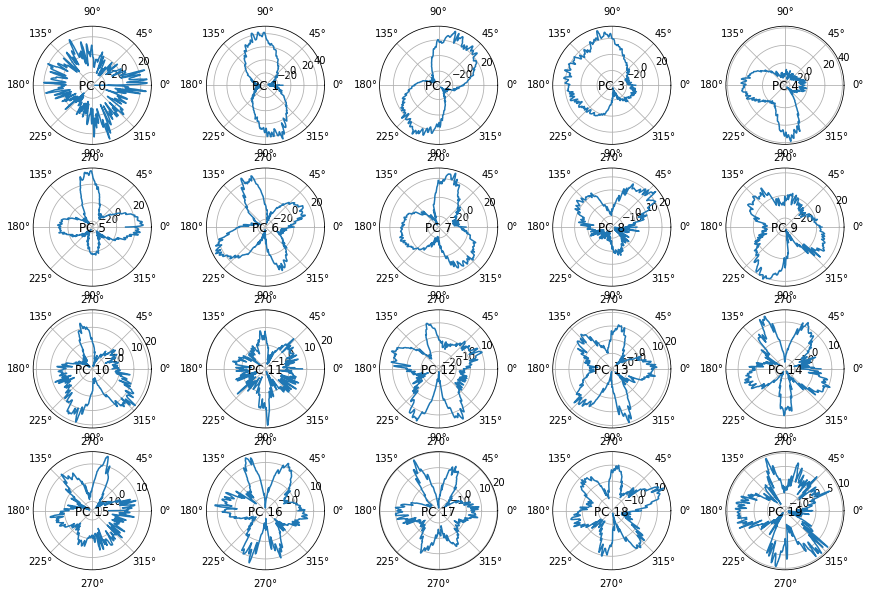

# # # # # # #  # # # # # # #  # # # # # # # GT2  


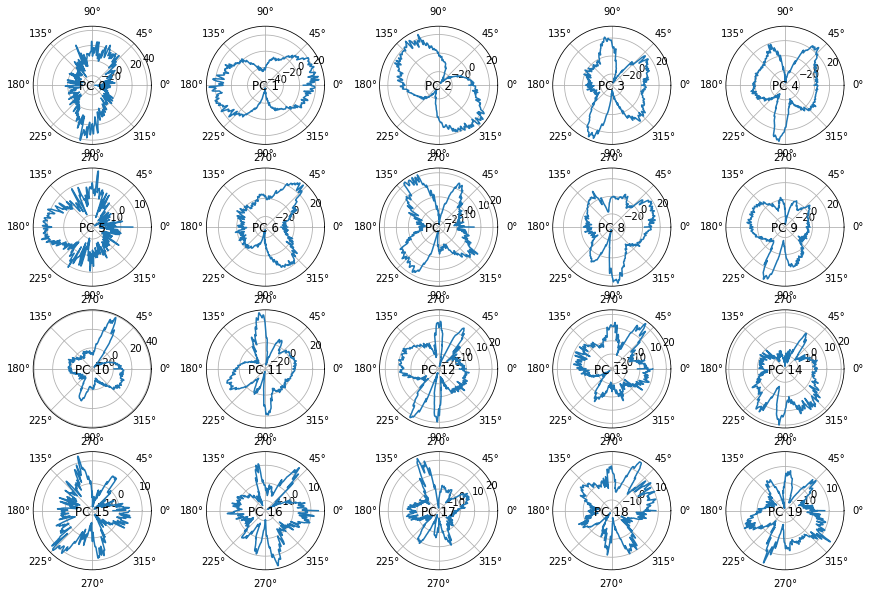

# # # # # # #  # # # # # # #  # # # # # # # GT3  


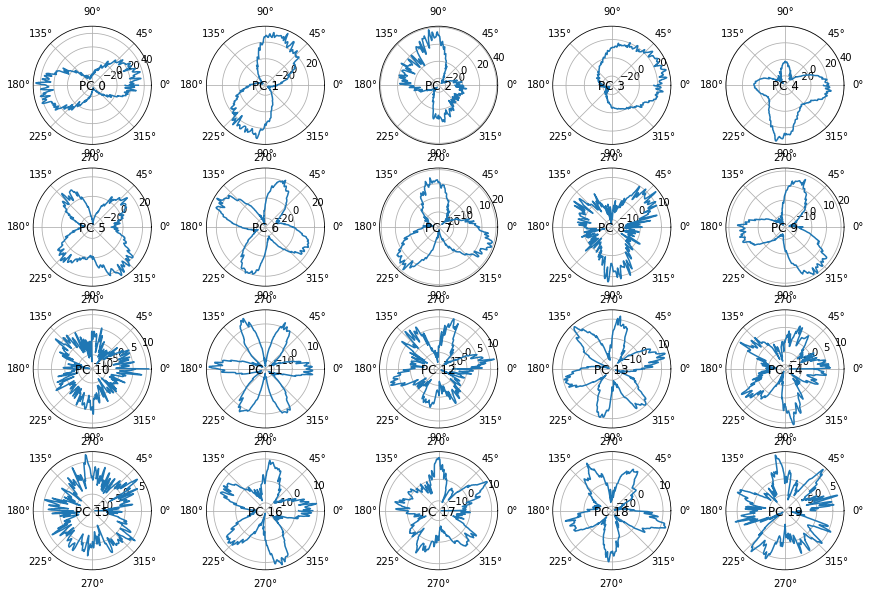

In [44]:
print("# # # # # # #  # # # # # # #  # # # # # # # GT1 # # # # # # #  # # # # # # #  # # # # # # # ")


data = dat_gratings_static_GT1

# PCA
_, X = run_pca(data, zs = True, n_cmp = n_cmp)

# Plot
plot_pca_weights(data, data['istim'], X, n_cmp)

print("# # # # # # #  # # # # # # #  # # # # # # # GT2 # # # # # # #  # # # # # # #  # # # # # # #  ")
data = dat_gratings_static_GT2

# PCA
_, X = run_pca(data, zs = True, n_cmp = n_cmp)

# Plot
plot_pca_weights(data, data['istim'], X, n_cmp)

print("# # # # # # #  # # # # # # #  # # # # # # # GT3 # # # # # # #  # # # # # # #  # # # # # # #  ")
data = dat_gratings_static_GT3

# PCA
_, X = run_pca(data, zs = True, n_cmp = n_cmp)

# Plot
plot_pca_weights(data, data['istim'], X, n_cmp)
